In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# Чтение данных
data = pd.read_csv('motion.csv', sep=';', header=None, decimal=',', names=['Time', 'Value'])


In [52]:
window_size = 10
data['Smoothed'] = data['Value'].rolling(window=window_size, center=True).mean()

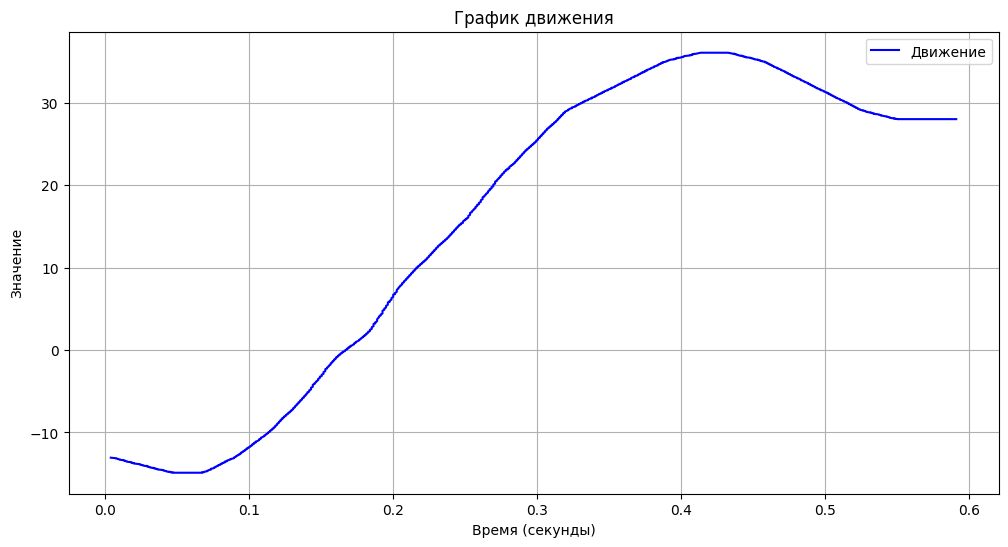

In [53]:
# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data['Time'], data['Smoothed'], label='Движение', color='blue')
plt.xlabel('Время (секунды)')
plt.ylabel('Значение')
plt.title('График движения')
plt.grid(True)
plt.legend()
plt.show()

In [55]:

# Вычисляем разницу между соседними временными точками
time_steps = data['Smoothed'].diff().dropna()  # diff() считает разницу, dropna() убирает первый NaN

# Выводим статистику временного шага
print("Статистика временного шага:")
print(time_steps.describe())

# Проверяем, постоянный ли шаг
if time_steps.nunique() == 1:
    print("\nВременной шаг постоянный:", time_steps.iloc[0])
else:
    print("\nВременной шаг НЕ постоянный. Примеры значений:")
    print(time_steps.head())

Статистика временного шага:
count    8.980000e+02
mean     4.576684e-02
std      6.758258e-02
min     -9.486122e-02
25%     -3.552714e-15
50%      4.743061e-02
75%      9.486122e-02
max      2.134378e-01
Name: Smoothed, dtype: float64

Временной шаг НЕ постоянный. Примеры значений:
6    -0.023715
7    -0.023715
8    -0.023715
9    -0.023715
10   -0.047431
Name: Smoothed, dtype: float64


In [56]:
# Убедимся, что время — числовой тип
data['Time'] = pd.to_numeric(data['Time'])

# Делаем время индексом
data.set_index('Time', inplace=True)

# Задаем новый временной шаг (например, средний шаг из данных)
dt = 0.001  # или задаем вручную, например, dt = 0.001

# Передискретизация с линейной интерполяцией
data_resampled = data.resample(f'{dt}S').interpolate('linear')

# Сброс индекса, если нужно вернуть время в столбец
data_resampled = data_resampled.reset_index()

# Проверяем новый временной шаг
new_time_steps = data_resampled['Time'].diff().dropna()
print("Новый временной шаг:", new_time_steps.mean())

/tmp/ipykernel_7940/1149053061.py:11: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data_resampled = data.resample(f'{dt}S').interpolate('linear')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'